## Nama : Debi Welani Christin Saragih
## ID : MC009D5X0246
## Kelas : MC-35

# Data Loading

In [1]:
#import libabry yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [2]:
#load dataset
df = pd.read_csv('https://raw.githubusercontent.com/debswell/Malnutrition-across-the-globe/refs/heads/main/Dataset/malnutrition-estimates.csv')
df

,Unnamed: 0,ISO code,Country,Survey Year,Year,Income Classification,LDC,LIFD,LLDC or SID2,Survey Sample (N),Severe Wasting,Wasting,Overweight,Stunting,Underweight,Notes,Report Author,Source,Short Source,U5 Population ('000s)
0,0,AFG,AFGHANISTAN,1997,1997,0,1.0,1.0,1.0,"4,846",NaN,18.2,6.5,53.2,44.9,Converted estimates,CIET International,Afghanistan 1997 multiple indicator baseline (...,MICS,3838.877
1,1,AFG,AFGHANISTAN,2004,2004,0,1.0,1.0,1.0,946,3.5,8.6,4.6,59.3,32.9,NaN,"Ministry of Public Health (Afghanistan), UNICE...",Summary report of the national nutrition surve...,NNS,4789.353
2,2,AFG,AFGHANISTAN,2013,2013,0,1.0,1.0,1.0,"44,26,469",4.0,9.5,5.3,40.4,24.6,NaN,"Ministry of Public Health, UNICEF and the Aga ...",Afghanistan National Nutrition Survey 2013.,SMART,5444.573
3,3,AFG,AFGHANISTAN,2018,2018,0,1.0,1.0,1.0,NaN,1.6,5.1,4.1,38.2,19.1,NaN,KIT Royal Tropical Institute,Afghanistan Health Survey 2018,Other,5601.443
4,4,ALB,ALBANIA,1996-98,1997,2,0.0,0.0,0.0,"7,642",NaN,8.1,9.5,20.4,7.1,Converted estimates,"Institute of Public Health, Food and Nutrition...",National study on nutrition in Albania. Instit...,Other,309.225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,919,ZWE,ZIMBABWE,2009,2009,1,0.0,1.0,1.0,"6,196",0.5,2.4,3.5,35.1,11.7,NaN,Zimbabwe National Statistics Agency (ZIMSTAT).,Zimbabwe multiple indicator monitoring survey ...,MICS,1938.279
920,920,ZWE,ZIMBABWE,2010-11,2010,1,0.0,1.0,1.0,"5,414",0.8,3.2,5.8,32.2,10.2,NaN,Zimbabwe National Statistics Agency (ZIMSTAT) ...,Zimbabwe demographic and health survey 2010-11...,DHS,1997.281
921,921,ZWE,ZIMBABWE,2014,2014,1,0.0,1.0,1.0,"9,591",0.7,3.2,3.6,27.6,11.2,NaN,Zimbabwe National Statistics Agency (ZIMSTAT).,Zimbabwe Multiple Indicator Cluster Survey 201...,MICS,2236.182
922,922,ZWE,ZIMBABWE,2015,2015,1,0.0,1.0,1.0,"6,380",1.1,3.3,5.6,27.1,8.5,NaN,Zimbabwe National Statistics Agency; ICF Inter...,"Zimbabwe Demographic and Health Survey 2015, N...",DHS,2258.788


**Kesimpulan :** Dataset yang dipakai terdiri dari 924 record dan 20 kolom

# EDA (Exploratory Data Analysis)

In [3]:
#Mencek informasi pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             924 non-null    int64  
 1   ISO code               924 non-null    object 
 2   Country                924 non-null    object 
 3   Survey Year            924 non-null    object 
 4   Year                   924 non-null    int64  
 5   Income Classification  924 non-null    int64  
 6   LDC                    924 non-null    float64
 7   LIFD                   924 non-null    float64
 8   LLDC or SID2           924 non-null    float64
 9   Survey Sample (N)      861 non-null    object 
 10  Severe Wasting         696 non-null    float64
 11  Wasting                877 non-null    float64
 12  Overweight             788 non-null    float64
 13  Stunting               887 non-null    float64
 14  Underweight            902 non-null    float64
 15  Notes 

**Kesimpulan :**

=> terdapat 8 fitur dengan tipe object, 12 lainnya bertipe data number (int dan float). Fitur Stunting yang menjadi fitur target bertipe float

=> Pada dataset jumlah datanya tidak seimbang, terdapat banyak nilai kosong, paling banyak terjadi pada fitur notes. Notes merupakan fitur yang tidak diperlukan dalam pembuatan model ML ini, jadi bisa diatasi dengan menghapusnya saja

In [4]:
#Mencek deskripsi statistik data
df.describe()

,Unnamed: 0,Year,Income Classification,LDC,LIFD,LLDC or SID2,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
count,924.000000,924.000000,924.00000,924.000000,924.000000,924.000000,696.000000,877.000000,788.000000,887.000000,902.000000,924.000000
mean,461.500000,2003.730519,1.24026,0.349567,0.424242,0.455628,2.191523,6.955644,6.434772,29.063134,15.841242,6182.704516
std,266.880123,8.792535,0.92202,0.477091,0.494495,0.686648,1.912586,5.039402,4.638849,15.834657,12.509643,16795.938144
min,0.000000,1983.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,230.750000,1996.000000,1.00000,0.000000,0.000000,0.000000,0.800000,2.900000,2.900000,16.650000,4.925000,559.669000
50%,461.500000,2004.500000,1.00000,0.000000,0.000000,0.000000,1.600000,5.900000,5.500000,29.200000,13.400000,1795.523000
75%,692.250000,2011.000000,2.00000,1.000000,1.000000,1.000000,2.900000,9.700000,8.700000,40.200000,23.100000,4194.214000
max,923.000000,2019.000000,3.00000,1.000000,1.000000,2.000000,12.900000,25.300000,30.100000,73.600000,66.800000,132966.782000


**Kesimpualan :**

Pada deskripsi statisik nilai mean dan nilai std nya belum seimbang dan perbedaan nilainya sangat jauh antar beberapa fitur

In [5]:
#Menghapus beberapa fitur yang tidak dibutuhkan
df.drop(['Unnamed: 0','ISO code','Survey Year','Survey Sample (N)','Notes','Report Author','Source','Short Source','LLDC or SID2'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                924 non-null    object 
 1   Year                   924 non-null    int64  
 2   Income Classification  924 non-null    int64  
 3   LDC                    924 non-null    float64
 4   LIFD                   924 non-null    float64
 5   Severe Wasting         696 non-null    float64
 6   Wasting                877 non-null    float64
 7   Overweight             788 non-null    float64
 8   Stunting               887 non-null    float64
 9   Underweight            902 non-null    float64
 10  U5 Population ('000s)  924 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 79.5+ KB


**Kesimpulan :**

=> Dari 20 kolom yang terdapat pada dataset, tersisi 13 kolom atau fitur yang akan digunakan dalam pembangunan model. 1 fitur dengan tipe object dan lainnya bertipe Numeric

In [6]:
#Cek Missing Values
df.isnull().sum()

,0
Country,0
Year,0
Income Classification,0
LDC,0
LIFD,0
Severe Wasting,228
Wasting,47
Overweight,136
Stunting,37
Underweight,22


=> Pada dataset terdapat beberapa missing value,  dan paling banyak terdapat pada severe wasting sebanyak 228. Aapabila missing value tersebut dihapus sepertinya kurang efektif karena jumlah dataset yang dimiliki hanya 924 baris. Apabila dilakukan penghapusan pada dataset yang kosong, nanti terdapat banyak informasi yang hilang. Oleh karena itu untuk mengatasi missing values kita dengan cara sederhana akan menggunakan nilai mean pada fitur dengan tipe number.

In [7]:
#Mengatasi missing value dengan nilai mean
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df = df.fillna(df_numeric.mean())
df.isnull().sum()

,0
Country,0
Year,0
Income Classification,0
LDC,0
LIFD,0
Severe Wasting,0
Wasting,0
Overweight,0
Stunting,0
Underweight,0


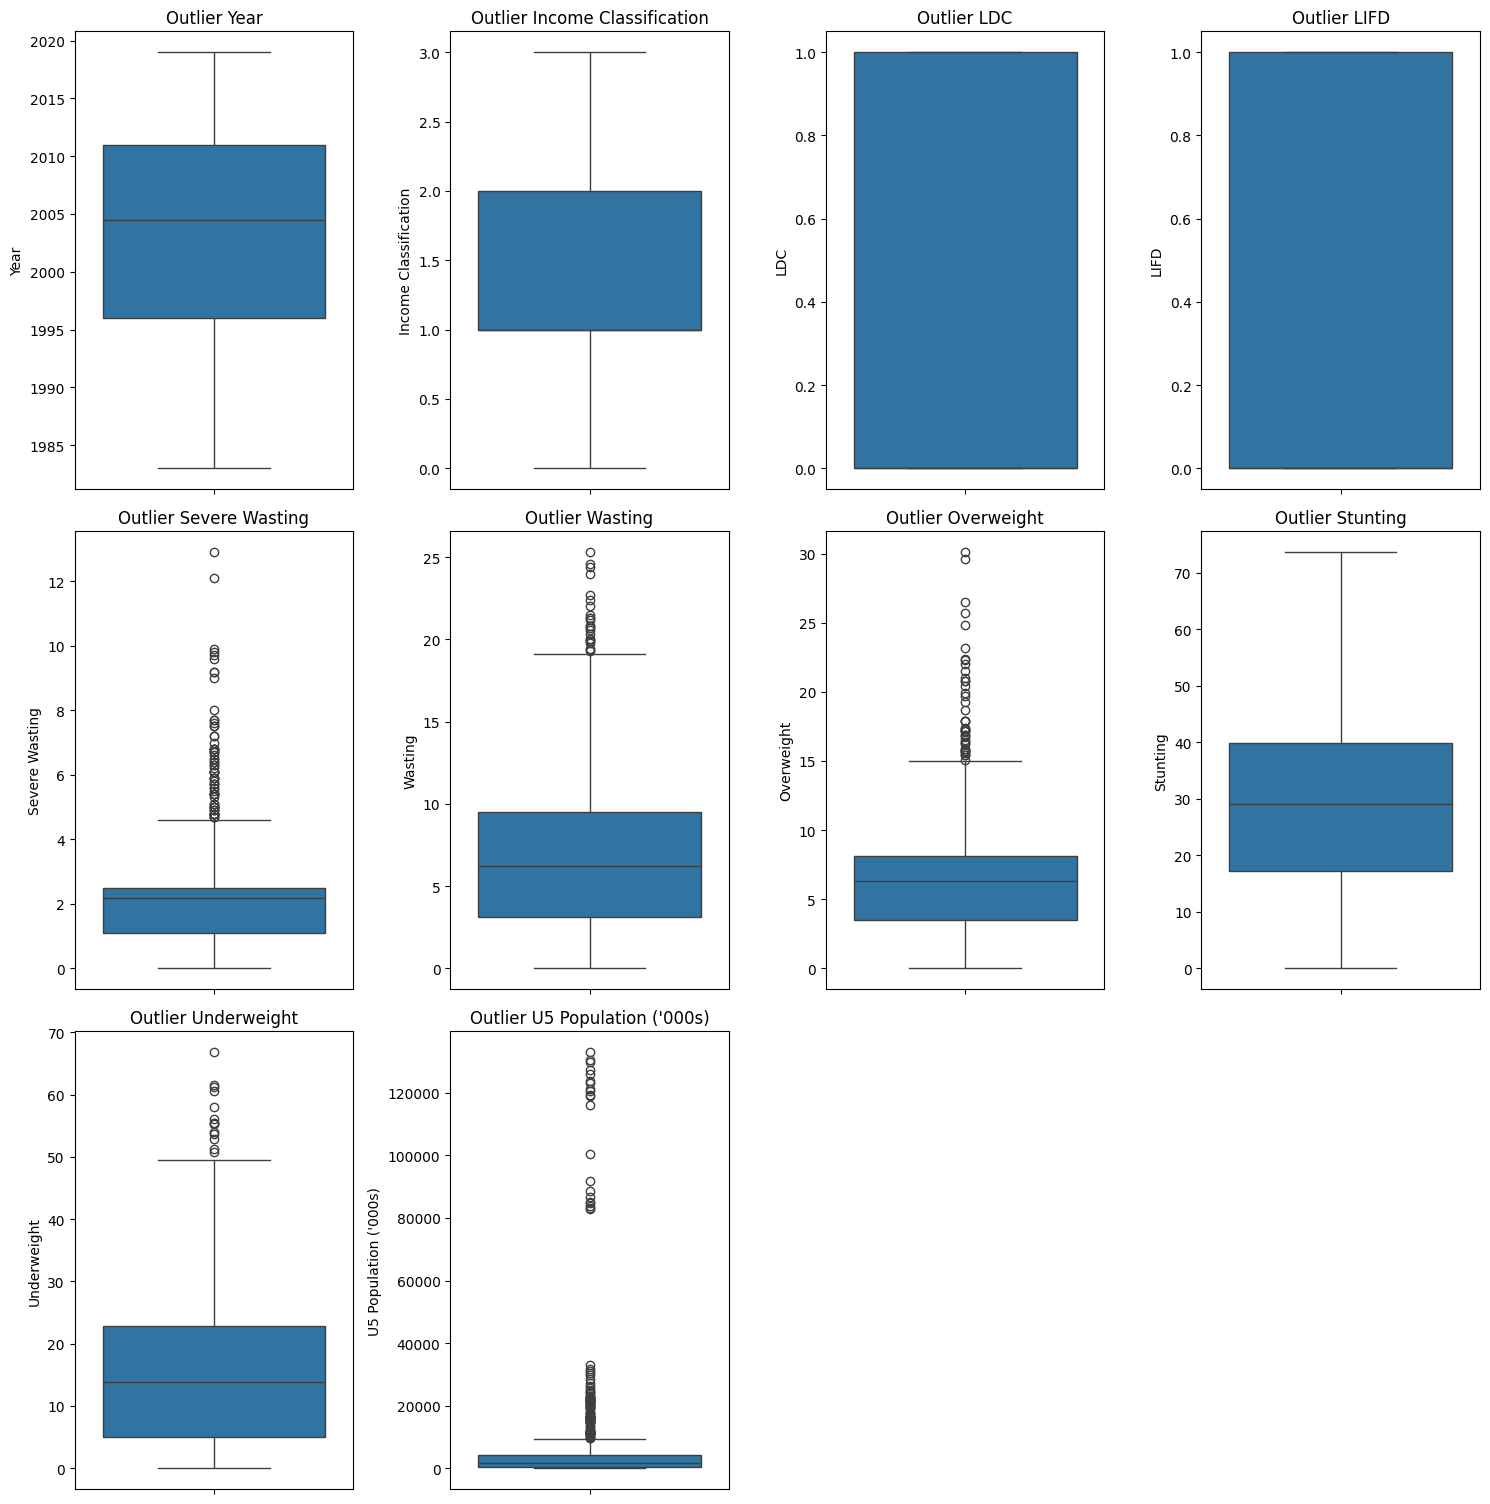

In [8]:
#Cek outlier pada fitur
n = len(df_numeric)
baris = (n // 3) + 1  # atur jumlah baris untuk subplot jika banyak fitur
plt.figure(figsize=(15, 5 * baris))
for i, col in enumerate(df_numeric, 1):
    plt.subplot(baris, 4, i)  # atur jadi 3 kolom per baris
    sns.boxplot(y=df[col])
    plt.title(f'Outlier {col}')
plt.tight_layout()  # <- ini harus pakai tanda kurung
plt.show()

**Kesimpulan :**

Ada beberapa fitur yang memiliki outlier seperti pada kolom Serve wasting, wasting,overweight,underweight dan population

In [9]:
#Hapus outliers
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
filter_outliers = ~((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)
df = df[filter_outliers]
df.shape

(752, 11)

**Kesimpulan :**

Setelah mengatasi outlier data yang tersisa adalah sebanyak 752

In [10]:
#Ekploratory fitur kategorikal
count = df['Country'].value_counts()
percent = 100*df['Country'].value_counts(normalize=True)
df_categorical= pd.DataFrame({'Jumlah : ':count,'Persentase':percent.round(1)})
df_categorical

,Jumlah :,Persentase
Country,,
VIET NAM,22,2.9
VENEZUELA (BOLIVARIAN REPUBLIC OF),21,2.8
JAMAICA,20,2.7
KUWAIT,18,2.4
MALAWI,15,2.0
...,...,...
NAURU,1,0.1
MARSHALL ISLANDS,1,0.1
QATAR,1,0.1


**Kesimpulan :**

Negara yang mengalami banyak kasus stunting terjadi pada negara Bangladesh dengan persentase 2.6

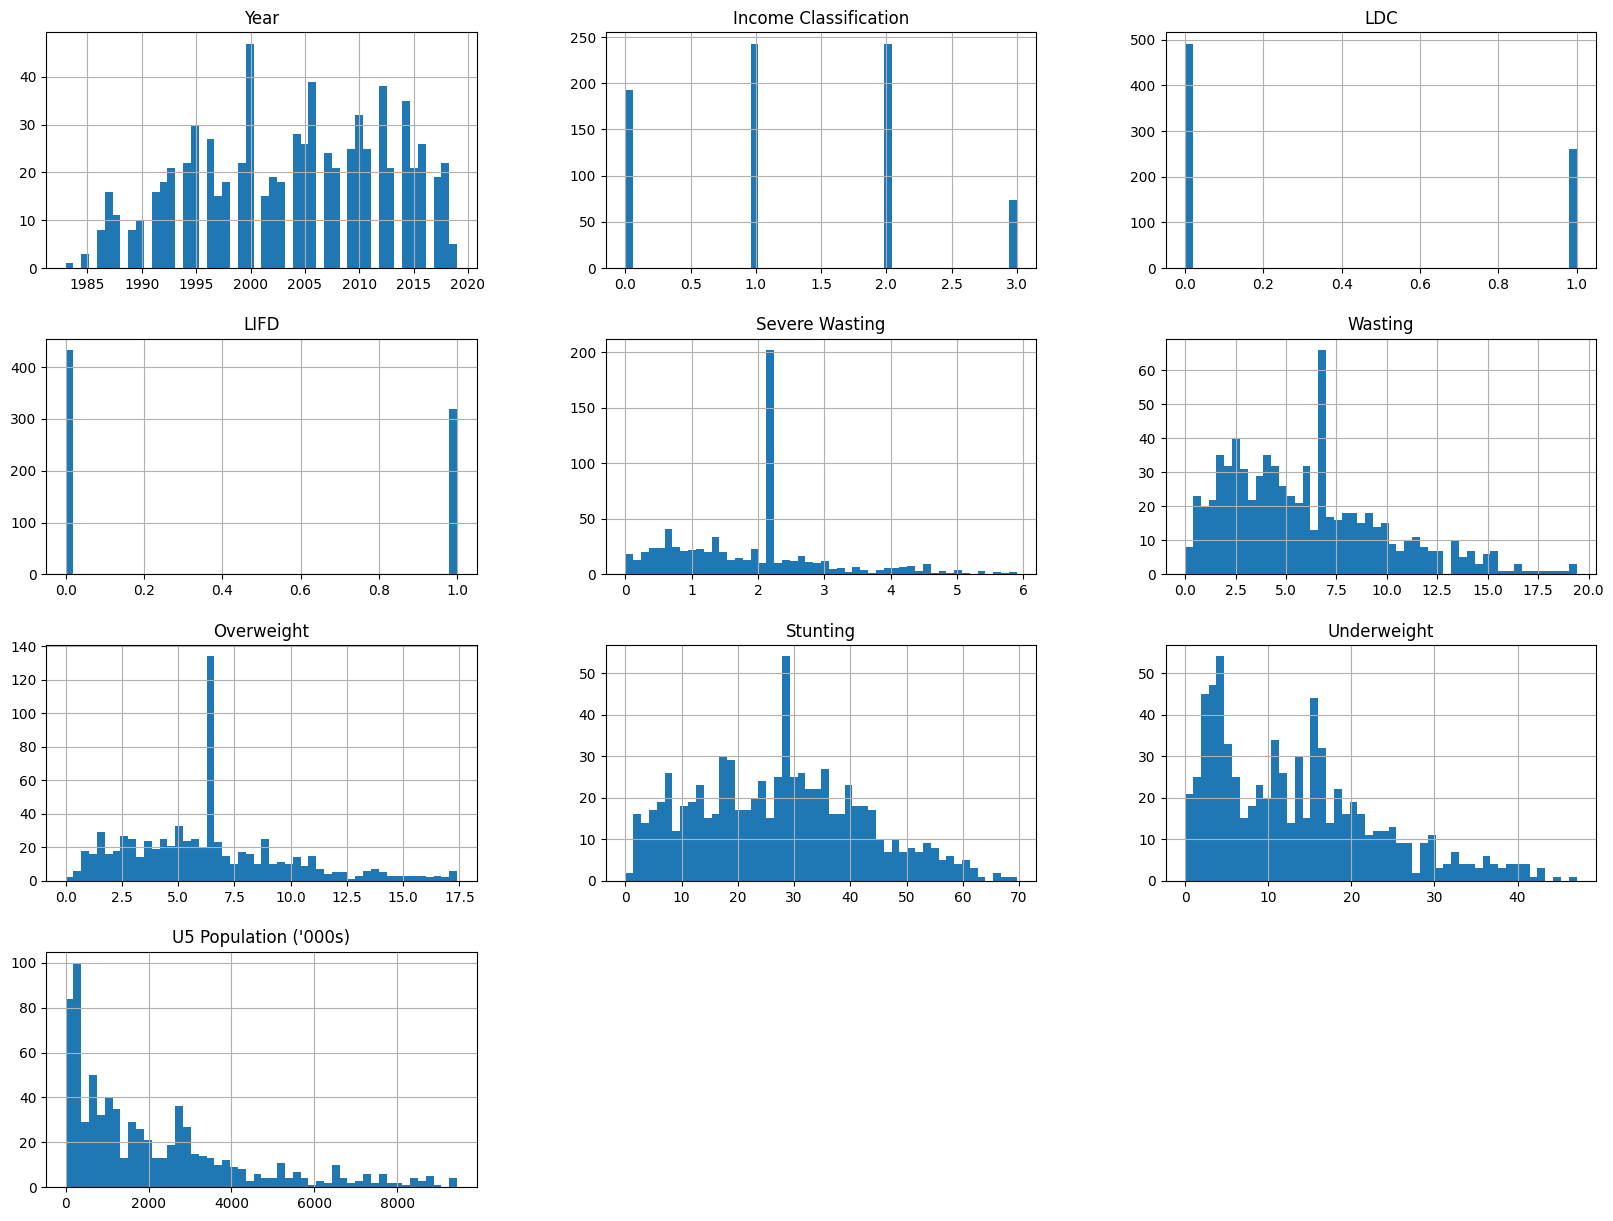

In [11]:
#Explore fitur numeric
df.hist(bins=50, figsize=(20,15))
plt.show()

**Kesimpulan :**

Pada garifk, terlihat bahwa kasus stunting tertinggi terjadi pada rentang usia 25-30 bulan.

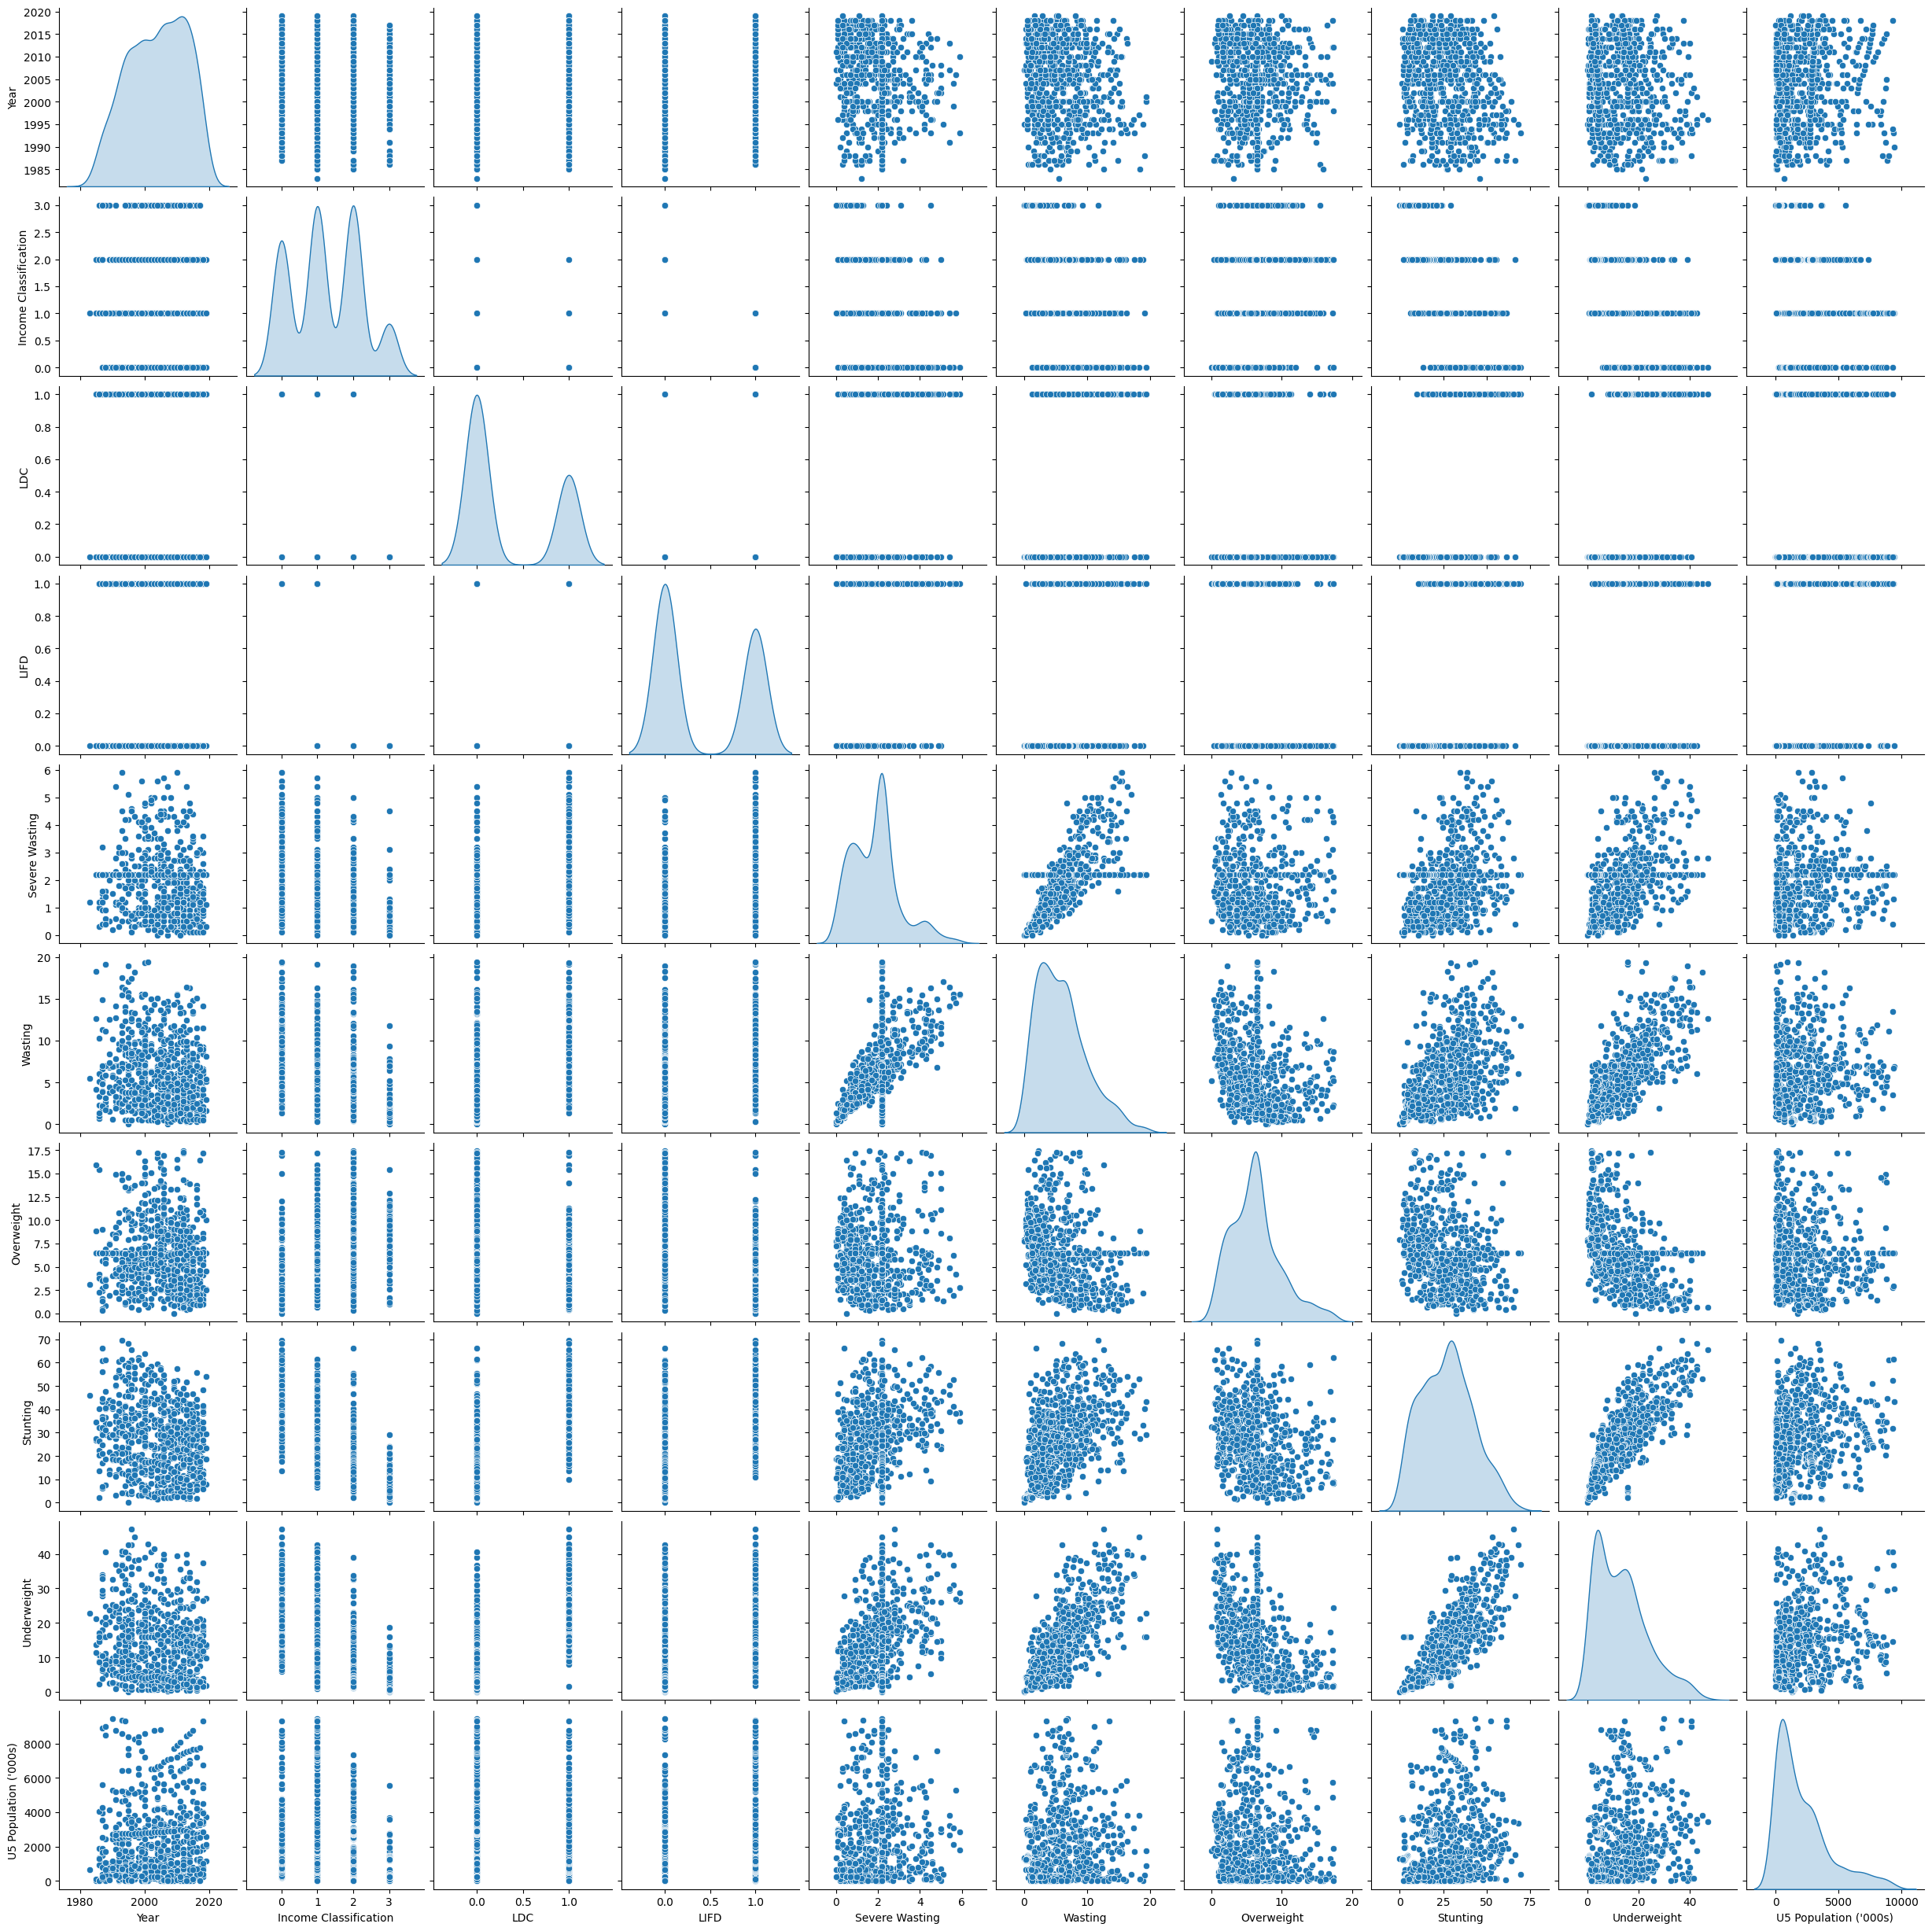

In [12]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind = 'kde')

=> Dilihat pada hubungan fitur, ada 3 fitur yang hubungannya tidak jelas dengan stunting karena plotnya hanya berbentuk vertikal lurus saja tetapi untuk melihat lebih jelasnya dapat digunakan metode heatmap dan hubungannya yang sedikit acak dengan stunting yaitu Populasi

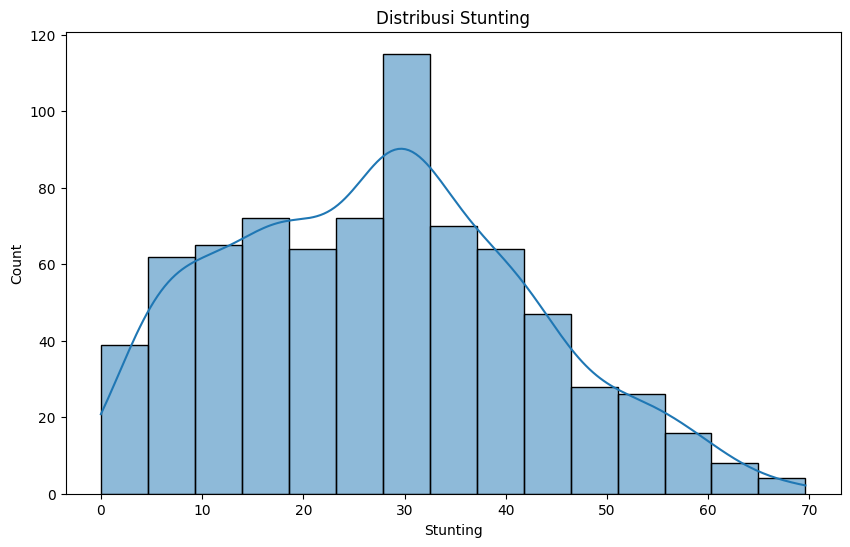

In [13]:
# Visualisasi distribusi target (Stunning)
plt.figure(figsize=(10, 6))
sns.histplot(df['Stunting'], kde=True)
plt.title('Distribusi Stunting')
plt.show()

**Kesimpulan :**

Pada grafik sebelumnya, kurang jelas bagaimana tingkat stunting. Pada grafik ini terlihat jelas bahwa stunting tertinggi terjadi pada rentang usia 30 bulan (sekitar 2 tahun) dengan total kasus adalah sebanyak 100 lebih. Kasus stunting menurun terjadi mulai usia 50 bulan

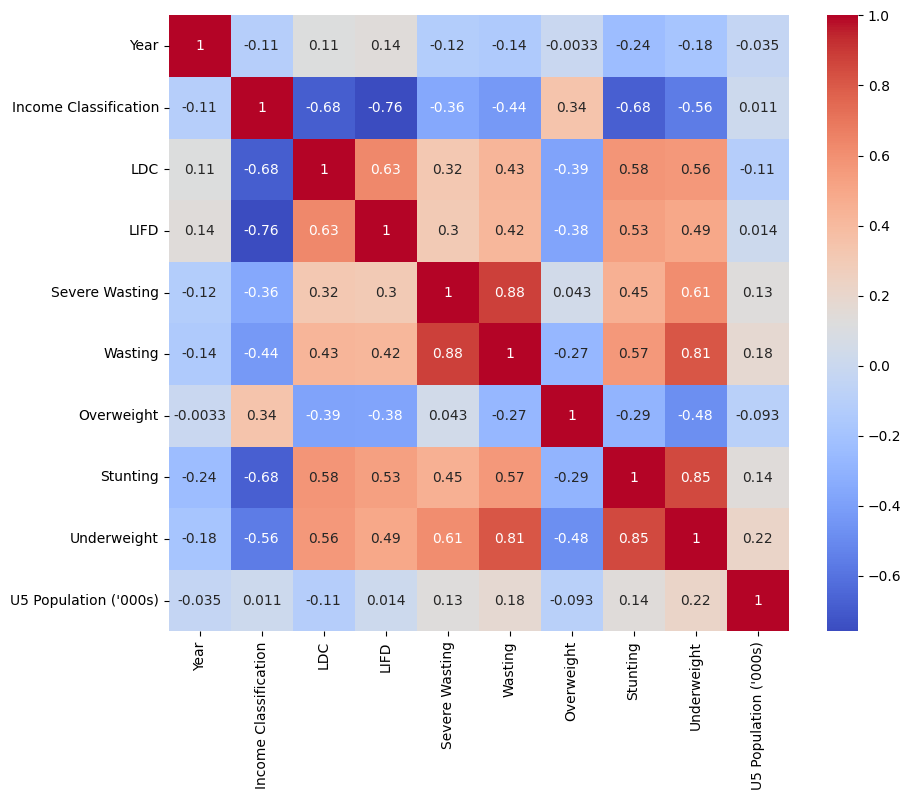

In [14]:
#cek dengan menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()

**Kesimpulan :**

Fitur yang ada cukup memiliki korelasi yang baik terhadap fitur target(stunting). Fitur yang memiliki korelasi paling rendha dengan stunting adalah populasi yaitu hanya 0.14, artinya populasi tidak terlalu berpengaruh terhadap kasus stunting.

# Data Preparation

In [15]:
# Encoding pada fitur 'Country'
country_mean = df.groupby('Country')['Stunting'].mean().to_dict()
df['Country_encoded'] = df['Country'].map(country_mean)

In [17]:
# Frequency Encoding pada fitur 'Country'
country_freq = df['Country'].value_counts().to_dict()
df['Country_freq'] = df['Country'].map(country_freq)

**Kesimpulan :**

Karena pada fitur country, terdapat banyak nilai unique maka untuk proses encoding menggunakan alteratif lain seperti Frequncy encoding

In [18]:
# Reduksi Dimensi dengan PCA untuk fitur Wasting
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(df[['Severe Wasting', 'Wasting']])
df['dim_Wasting'] = pca.transform(df.loc[:, ('Severe Wasting', 'Wasting')]).flatten()

In [19]:
# Tampilkan variance explained
print("\nVariance explained by PCA:", pca.explained_variance_ratio_.round(3))


Variance explained by PCA: [0.964]


In [20]:
# Drop kolom asli setelah PCA
df.drop(['Severe Wasting', 'Wasting'], axis=1, inplace=True)

**Penjelasan :**

Terdapat 2 fitur yang mirip dan memiliki korelasi yang cukup tinggi, yaitu Serve wasting dan wasting. Oleh karena itu dilakukan pengurangan dimensi dengan menggunakan PCA dan membuat fitur baru untuk menggantikan kedua fitur dengan nama fitur dim_wasting

In [21]:
# Tambahkan feature interaksi
df['Underweight_Overweight'] = df['Underweight'] * df['Overweight']
df['Pop_Income'] = df["U5 Population ('000s)"] * df['Income Classification']

In [22]:
# Tambahkan feature polynomial untuk fitur penting
df['Year_squared'] = df['Year'] ** 2

In [23]:
# Persiapan data untuk modeling
X = df.drop(["Stunting", "Country"], axis=1)  # Drop Country asli, gunakan encoded
X['Country'] = df['Country_encoded']  # Gunakan target encoding
y = df["Stunting"]

In [24]:
#Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123)

In [25]:
#Cek jumlah sampel
print(f'Jumlah data: {len(df)}')
print(f'Jumlah sampel X_train: {X_train.shape[0]}, Jumlah sampel X_test: {X_test.shape[0]}')

Jumlah data: 752
Jumlah sampel X_train: 601, Jumlah sampel X_test: 151


In [26]:
#Standarisasi data
from sklearn.preprocessing import StandardScaler

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numerical_features] = scaler.transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

In [27]:
# Cek statistik data setelah scaling
print("\nStatistik data setelah scaling:")
print(X_train_scaled[numerical_features].describe().round(4))


Statistik data setelah scaling:
           Year  Income Classification       LDC      LIFD  Overweight  \
count  601.0000               601.0000  601.0000  601.0000    601.0000   
mean     0.0000                -0.0000   -0.0000   -0.0000     -0.0000   
std      1.0008                 1.0008    1.0008    1.0008      1.0008   
min     -2.3579                -1.2985   -0.7329   -0.8732     -1.8108   
25%     -0.7754                -1.2985   -0.7329   -0.8732     -0.7414   
50%      0.1288                -0.2676   -0.7329   -0.8732      0.0390   
75%      0.9201                 0.7633    1.3645    1.1452      0.5304   
max      1.7113                 1.7942    1.3645    1.1452      3.2185   

       Underweight  U5 Population ('000s)  Country_encoded  Country_freq  \
count     601.0000               601.0000         601.0000      601.0000   
mean        0.0000                 0.0000          -0.0000       -0.0000   
std         1.0008                 1.0008           1.0008        1.0008

**Kesimpulan :**

Data yang akan digunakan sudah seragam dengan nilai mean 0 dan std nya 1

# Modelling

In [28]:
metrics = ['MAE', 'RMSE', 'R2']
models_train = pd.DataFrame(index=metrics, columns=['LinearRegression', 'Ridge', 'Lasso', 'RandomForest', 'XGBoost'])
models_test = pd.DataFrame(index=metrics, columns=['LinearRegression', 'Ridge', 'Lasso', 'RandomForest', 'XGBoost'])

**Kesimpulan :**

Pada tahap modelling, digunakan model regresi. Regresi yang digunakan ada 5, dan ketika di evalusi, model dengan nilai pebandingan error antara data train dan test yang paling sedikit itu yang akan digunakan

In [29]:
#Import Library
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Linear Regression sebagai baseline
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_train_pred_lr = lr.predict(X_train_scaled)
y_test_pred_lr = lr.predict(X_test_scaled)

models_train.loc['MAE', 'LinearRegression'] = mean_absolute_error(y_train, y_train_pred_lr)
models_train.loc['RMSE', 'LinearRegression'] = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
models_train.loc['R2', 'LinearRegression'] = r2_score(y_train, y_train_pred_lr)

models_test.loc['MAE', 'LinearRegression'] = mean_absolute_error(y_test, y_test_pred_lr)
models_test.loc['RMSE', 'LinearRegression'] = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
models_test.loc['R2', 'LinearRegression'] = r2_score(y_test, y_test_pred_lr)

In [30]:
# 2. Ridge Regression (untuk mengatasi multicollinearity)
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0, random_state=123)
ridge.fit(X_train_scaled, y_train)
y_train_pred_ridge = ridge.predict(X_train_scaled)
y_test_pred_ridge = ridge.predict(X_test_scaled)

models_train.loc['MAE', 'Ridge'] = mean_absolute_error(y_train, y_train_pred_ridge)
models_train.loc['RMSE', 'Ridge'] = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
models_train.loc['R2', 'Ridge'] = r2_score(y_train, y_train_pred_ridge)

models_test.loc['MAE', 'Ridge'] = mean_absolute_error(y_test, y_test_pred_ridge)
models_test.loc['RMSE', 'Ridge'] = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))
models_test.loc['R2', 'Ridge'] = r2_score(y_test, y_test_pred_ridge)

In [31]:
# 3. Lasso Regression (untuk feature selection)
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1, random_state=123)
lasso.fit(X_train_scaled, y_train)
y_train_pred_lasso = lasso.predict(X_train_scaled)
y_test_pred_lasso = lasso.predict(X_test_scaled)

models_train.loc['MAE', 'Lasso'] = mean_absolute_error(y_train, y_train_pred_lasso)
models_train.loc['RMSE', 'Lasso'] = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
models_train.loc['R2', 'Lasso'] = r2_score(y_train, y_train_pred_lasso)

models_test.loc['MAE', 'Lasso'] = mean_absolute_error(y_test, y_test_pred_lasso)
models_test.loc['RMSE', 'Lasso'] = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))
models_test.loc['R2', 'Lasso'] = r2_score(y_test, y_test_pred_lasso)


In [32]:
# 4. Random Forest dengan parameter yang mengurangi overfitting
rf = RandomForestRegressor(
    n_estimators=100,    # Lebih banyak trees
    max_depth=5,         # Batasi kedalaman untuk mengurangi overfitting
    min_samples_split=5, # Hindari split pada sampel yang terlalu kecil
    min_samples_leaf=2,  # Hindari leaf dengan sampel terlalu sedikit
    max_features='sqrt', # Batasi jumlah fitur yang dipertimbangkan per split
    random_state=123,
    n_jobs=-1
)
rf.fit(X_train_scaled, y_train)
y_train_pred_rf = rf.predict(X_train_scaled)
y_test_pred_rf = rf.predict(X_test_scaled)

models_train.loc['MAE', 'RandomForest'] = mean_absolute_error(y_train, y_train_pred_rf)
models_train.loc['RMSE', 'RandomForest'] = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
models_train.loc['R2', 'RandomForest'] = r2_score(y_train, y_train_pred_rf)

models_test.loc['MAE', 'RandomForest'] = mean_absolute_error(y_test, y_test_pred_rf)
models_test.loc['RMSE', 'RandomForest'] = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
models_test.loc['R2', 'RandomForest'] = r2_score(y_test, y_test_pred_rf)


In [33]:
# 5. XGBoost dengan regularisasi untuk mengurangi overfitting
import xgboost as xgb
xgb_reg = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.05,  # Lower learning rate
    max_depth=3,         # Shallow trees to prevent overfitting
    subsample=0.8,       # Use 80% of data per tree
    colsample_bytree=0.8, # Use 80% of features per tree
    reg_alpha=0.1,       # L1 regularization
    reg_lambda=1.0,      # L2 regularization
    random_state=123
)
xgb_reg.fit(X_train_scaled, y_train)
y_train_pred_xgb = xgb_reg.predict(X_train_scaled)
y_test_pred_xgb = xgb_reg.predict(X_test_scaled)

models_train.loc['MAE', 'XGBoost'] = mean_absolute_error(y_train, y_train_pred_xgb)
models_train.loc['RMSE', 'XGBoost'] = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
models_train.loc['R2', 'XGBoost'] = r2_score(y_train, y_train_pred_xgb)

models_test.loc['MAE', 'XGBoost'] = mean_absolute_error(y_test, y_test_pred_xgb)
models_test.loc['RMSE', 'XGBoost'] = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
models_test.loc['R2', 'XGBoost'] = r2_score(y_test, y_test_pred_xgb)

In [34]:
# Tampilkan hasil evaluasi
print("\nTrain metrics:")
print(models_train)
print("\nTest metrics:")
print(models_test)


Train metrics:
     LinearRegression     Ridge     Lasso RandomForest   XGBoost
MAE          3.046319  3.127291  3.155386     2.955335  2.354477
RMSE         4.132553  4.255727  4.283603      3.92988  3.182288
R2             0.9255  0.920992  0.919954     0.932628  0.955823

Test metrics:
     LinearRegression     Ridge     Lasso RandomForest   XGBoost
MAE          2.834311  2.803583  2.890493     3.532671  3.038357
RMSE          3.81369  3.747277  3.843633     4.875005  4.209325
R2           0.919784  0.922554   0.91852     0.868925  0.902278


**Kesimpulan :**

Pada hasil evaluasi, model dengan hasil yang baik adalah Ridge dan Lasso tetapi apabila dibandingkan ahsil metrik antara Ridge dan Lasso, model yang paling baik adalah Ridge dengan perbandingan mterik pada data train dan data test yang lebih kecil. Oleh karena itu kita akan menggunakan model regresi Ridge dalam pembangunan model untuk melakukan prediksi

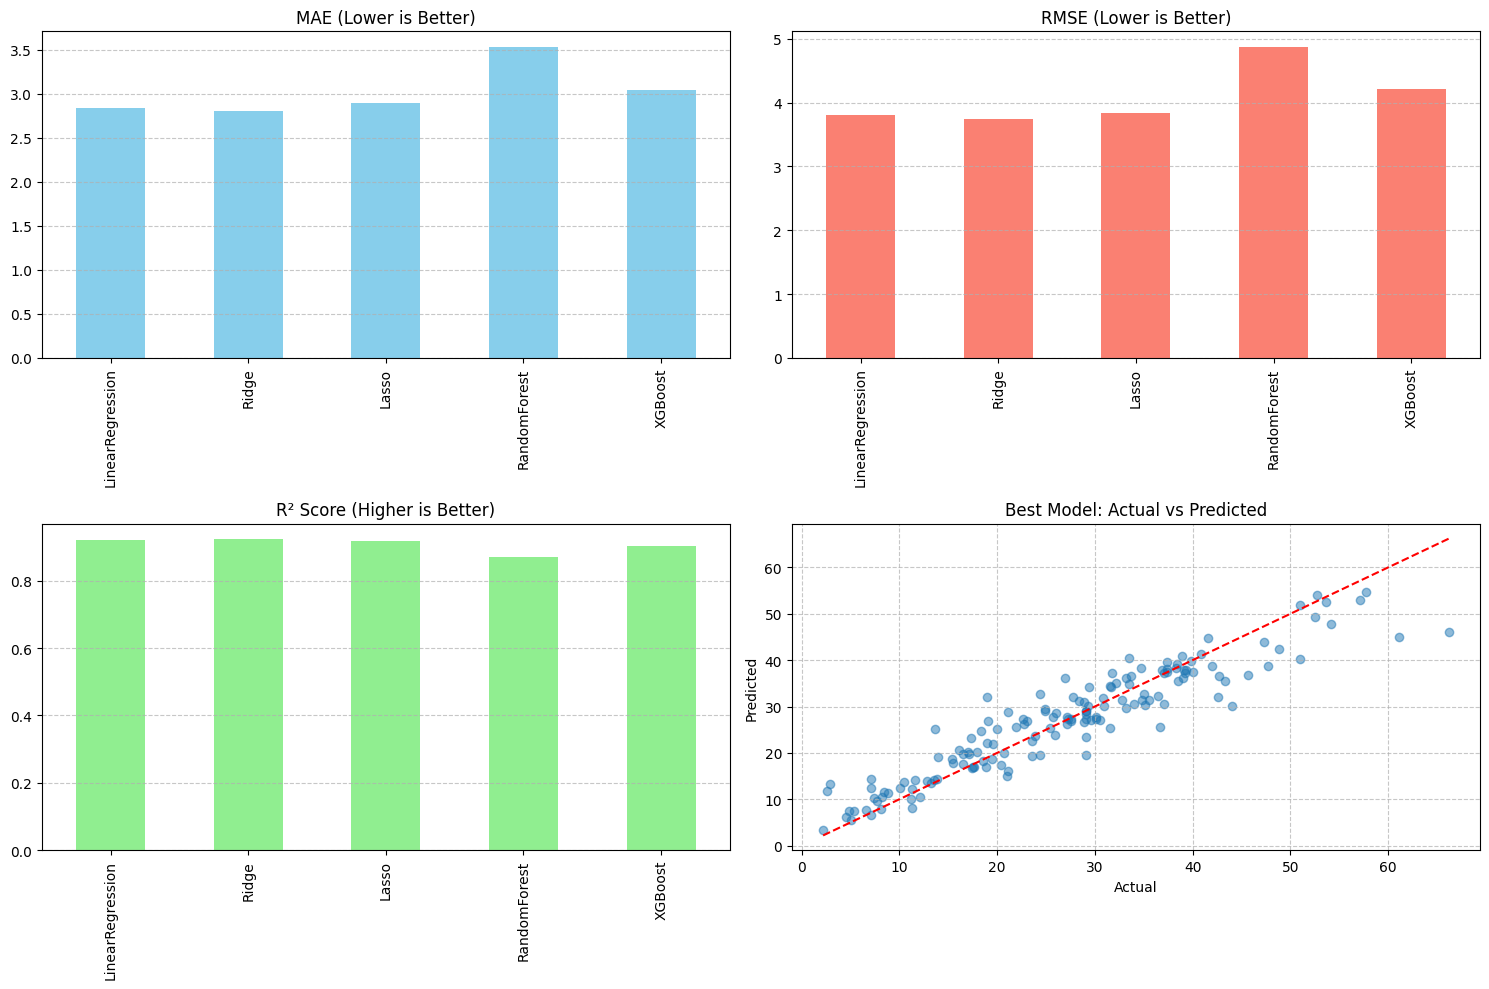

In [35]:
# Visualisasi perbandingan model
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
models_test.loc['MAE'].plot(kind='bar', color='skyblue')
plt.title('MAE (Lower is Better)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(2, 2, 2)
models_test.loc['RMSE'].plot(kind='bar', color='salmon')
plt.title('RMSE (Lower is Better)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(2, 2, 3)
models_test.loc['R2'].plot(kind='bar', color='lightgreen')
plt.title('R² Score (Higher is Better)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(2, 2, 4)
plt.scatter(y_test, y_test_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Best Model: Actual vs Predicted')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [36]:
# FINALISASI MODEL RIDGE REGRESSION

# Inisialisasi model Ridge dengan parameter optimal
# tuning alpha (opsional)
ridge_model = Ridge(alpha=1.0, random_state=123)

# Latih model menggunakan seluruh data training
print("Melatih model Ridge Regression...")
ridge_model.fit(X_train_scaled, y_train)

Melatih model Ridge Regression...


Ridge(random_state=123)

In [37]:
# Evaluasi model
y_train_pred = ridge_model.predict(X_train_scaled)
y_test_pred = ridge_model.predict(X_test_scaled)

In [38]:
# Tampilkan hasil evaluasi
print("\nEvaluasi model Ridge Regression:")
print(f"Train R²: {r2_score(y_train, y_train_pred):.4f}")
print(f"Test R²: {r2_score(y_test, y_test_pred):.4f}")
print(f"Train MAE: {mean_absolute_error(y_train, y_train_pred):.4f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_test_pred):.4f}")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")


Evaluasi model Ridge Regression:
Train R²: 0.9210
Test R²: 0.9226
Train MAE: 3.1273
Test MAE: 2.8036
Train RMSE: 4.2557
Test RMSE: 3.7473


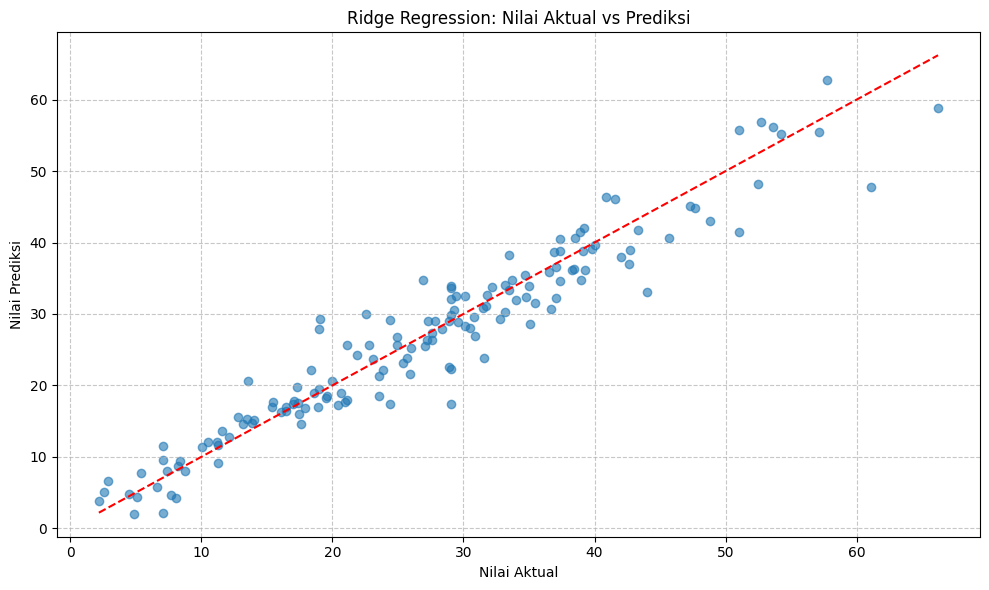

In [39]:
# VISUALISASI HASIL MODEL

# Plot prediksi vs aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Ridge Regression: Nilai Aktual vs Prediksi')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Kesimpulan :**

sesuai dari plot prediksi dan aktual yang didapatkan, model yang dibangun cukup baik pada nilai aktual

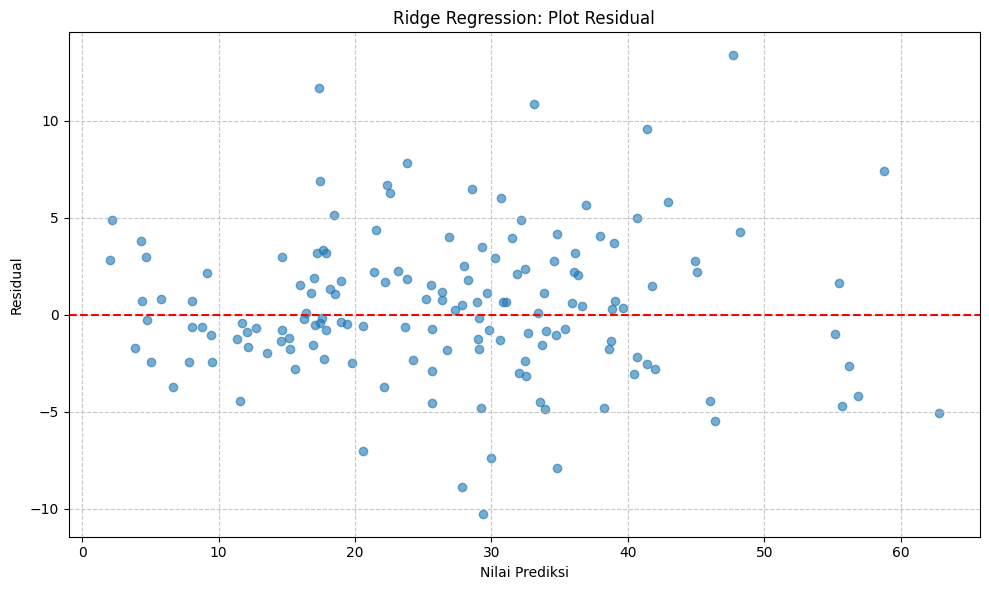

In [40]:
# Plot residual
plt.figure(figsize=(10, 6))
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Nilai Prediksi')
plt.ylabel('Residual')
plt.title('Ridge Regression: Plot Residual')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

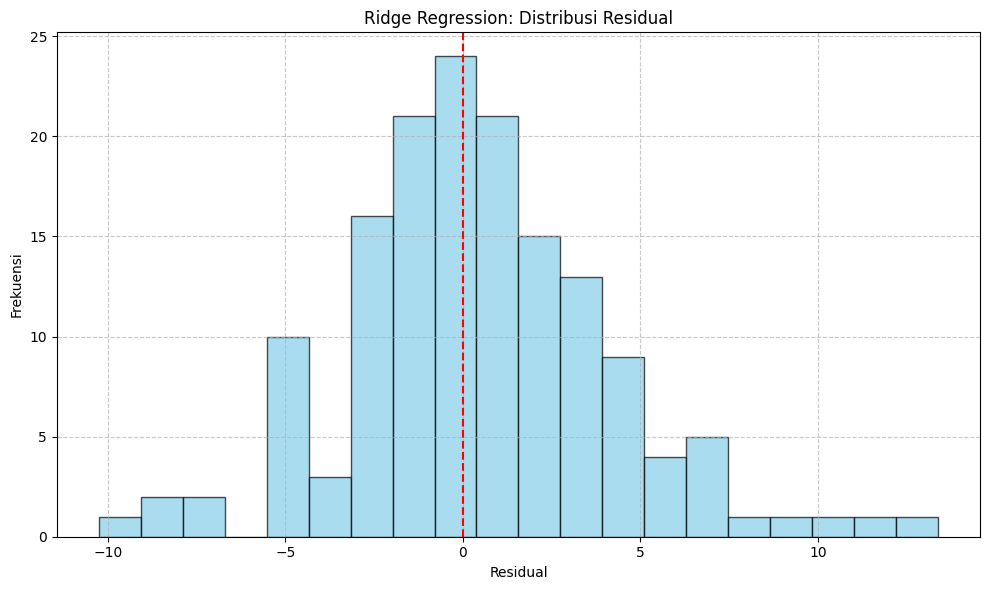

In [41]:
# Histogram residual
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Residual')
plt.ylabel('Frekuensi')
plt.title('Ridge Regression: Distribusi Residual')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

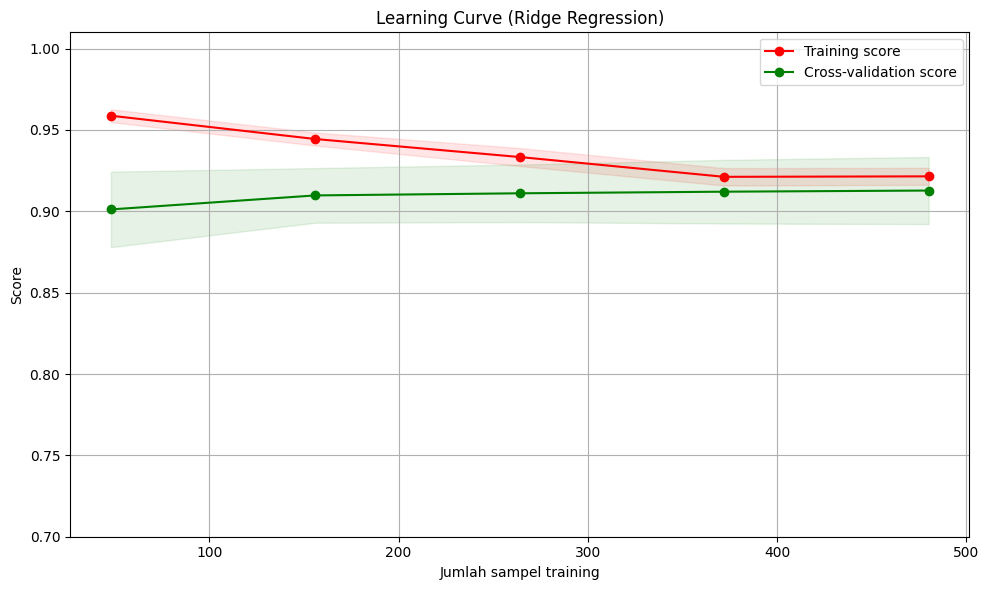

In [45]:
# LEARNING CURVE UNTUK MEMASTIKAN TIDAK ADA OVERFITTING

# Plot learning curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
def plot_learning_curve(estimator, X, y, title, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Jumlah sampel training")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='r2')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt

# Plot learning curve
cv = KFold(n_splits=5, shuffle=True, random_state=123)
plot_learning_curve(ridge_model, X_train_scaled, y_train,
                    "Learning Curve (Ridge Regression)", ylim=(0.7, 1.01), cv=cv)
plt.tight_layout()
plt.show()

**Kesimpulan :**

Hasil akurasi yang didapatkan cukup baik itu terjadi pada akurasi lebih dari 90% pada jumlah sampel 400 an

In [48]:
# MELAKUKAN PREDIKSI DENGAN SKENARIO UNTUK MELATIH MODEL

# 1. Pertama, pastikan kita memiliki daftar fitur yang tepat
print("Fitur-fitur yang digunakan dalam model:")
print(X_train_scaled.columns.tolist())

# 2. Buat fungsi helper untuk memastikan sample_data memiliki semua fitur yang diperlukan
def prepare_prediction_data(sample_data, required_features):
    """
    Memastikan data prediksi memiliki semua fitur yang diperlukan oleh model.

    Parameters:
    -----------
    sample_data : dict
        Dictionary berisi data input
    required_features : list
        Daftar fitur yang diperlukan oleh model

    Returns:
    --------
    dict : Dictionary yang sudah dilengkapi dengan semua fitur yang diperlukan
    """
    # Buat copy dari data asli
    complete_data = sample_data.copy()

    # Periksa fitur yang hilang
    missing_features = []
    for feature in required_features:
        if feature not in complete_data:
            missing_features.append(feature)
            complete_data[feature] = 0  # Default value

    if missing_features:
        print(f"Ada {len(missing_features)} fitur yang ditambahkan dengan nilai default 0:")
        print(missing_features)

    return complete_data

# 3. Skenario untuk Indonesia tahun 2025
print("\n========== SKENARIO 1: INDONESIA 2025 ==========")
try:
    # Data untuk Indonesia
    indonesia_2025 = {
        'Year': 2025,
        'Overweight': 5.5,
        'Underweight': 15.0,
        "U5 Population ('000s)": 25000,
        'dim_Wasting': 0.3,
        'Country_encoded': 35.0,  # Target encoding untuk Indonesia
        'Income Classification': 2,  # Lower-middle income
        'LDC': 0,  # Bukan Least Developed Country
        'LIFD': 0,  # Bukan Low Income Food Deficit
        'Country_freq': 15,  # Frequency encoding
        'Underweight_Overweight': 5.5 * 15.0,  # 82.5
        'Pop_Income': 25000 * 2,  # 50000
        'Year_squared': 2025 ** 2  # 4100625
    }

    # Pastikan semua fitur yang diperlukan tersedia
    complete_data = prepare_prediction_data(indonesia_2025, X_train_scaled.columns)

    # Prediksi
    prediction = predict_stunting(ridge_model, scaler, complete_data, X_train_scaled.columns)
    print(f"Prediksi prevalensi stunting untuk Indonesia tahun 2025: {prediction:.2f}%")
except Exception as e:
    print(f"Error saat melakukan prediksi: {e}")


Fitur-fitur yang digunakan dalam model:
['Year', 'Income Classification', 'LDC', 'LIFD', 'Overweight', 'Underweight', "U5 Population ('000s)", 'Country_encoded', 'Country_freq', 'dim_Wasting', 'Underweight_Overweight', 'Pop_Income', 'Year_squared', 'Country']

========== SKENARIO 1: INDONESIA 2025 ==========
Ada 1 fitur yang ditambahkan dengan nilai default 0:
['Country']
Prediksi prevalensi stunting untuk Indonesia tahun 2025: 7.64%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
